# Fraud Detection with Naive Bayes Classifier

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import seaborn as sns

from matplotlib import style
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB 
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.metrics import confusion_matrix, f1_score, recall_score, precision_score, accuracy_score, average_precision_score,  roc_auc_score, precision_recall_curve


# Data Collection and Investigation

In [2]:
# Input data files are available in the "../input/" directory
df = pd.read_csv('D:/Python Project/Kaggle/input/creditcard.csv')

# printing the first 5 columns for data visualization 
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Checks how many fraud in this dataset
print(df['Class'].value_counts())

print('\nFraud is {}% of our data.'.format(df['Class'].value_counts()[1] / float(df['Class'].value_counts()[0])*100))


0    284315
1       492
Name: Class, dtype: int64

Fraud is 0.17304750013189596% of our data.


Conclusion = Imbalance. Learning of the data might bias 

## Preparing train and test dataset
### Dimension extraction
Now extract Time to Amount as features. Due to privacy, denoted as Vn <br>
Class as target <br>
Drop time and standardize amount value before do PCA <br>

In [4]:
df.drop(["Time"], axis=1, inplace=True)
df['Amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))

df.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [5]:
features = df.iloc[:, df.columns != 'Class']
target = df.iloc[:, df.columns == 'Class']

features.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


## Train Test Split

Now split the original dataset into train and test with stratify enable to target class.<br><br>
The purpose of stratify is to __ensure that in each split must at least got one Fraud__ to counter the problem of higly skewed. <br>
For example, if there are 25% of fraud and 75% of non-fraud, stratify will make sure that your random split has 25% of fraud and 75% of non-fraud.
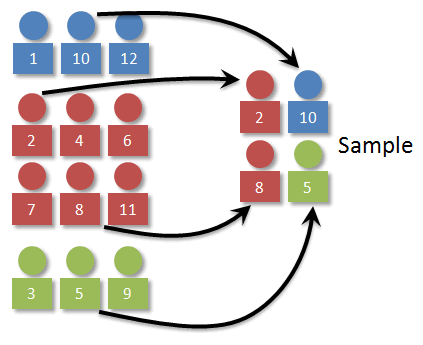

Random State aims to shuffle and split data randomly __and guarantee that the output of Split 1 will be equal to the output of Split 2__. <br>
__The order in which x_train and y_train will not be change__ <br>
__Used for reproducing problem the same every time it is run__ <br>
Without random state, everytime run it , it will get a different ordering result <br>
0 or 42 is best practices
https://stackoverflow.com/questions/28064634/random-state-pseudo-random-numberin-scikit-learn

In [6]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42, stratify=target)

print("Total numbers of original dataset", len(x_train)+len(x_test))
print("Splited numbers of training data", len(x_train))
print("Splited numbers of test data", len(x_test))

print("\nTraining set")
print("==================")
print("Total number of legal transaction in training set", y_train['Class'].value_counts()[0])
print("Total number of fraud in training set", y_train['Class'].value_counts()[1], "\n")

print("Testing set")
print("==================")
print("Total number of legal transaction in testing set", y_test['Class'].value_counts()[0])
print("Total number of fraud in testing set", y_test['Class'].value_counts()[1])


Total numbers of original dataset 284807
Splited numbers of training data 227845
Splited numbers of test data 56962

Training set
Total number of legal transaction in training set 227451
Total number of fraud in training set 394 

Testing set
Total number of legal transaction in testing set 56864
Total number of fraud in testing set 98


### Scaling Features and PCA transformation
Scale down the feature by looking into STD then execute PCA to reduce the number of features needed and curse of dimensionality

In [7]:
from sklearn.decomposition import PCA

# PCA transformation
pca = PCA(.95)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

pca.n_components_


23

# Model Building
For this notebook / python, used Bayesian Classification as classifier model.


## Train the classifier
Then we can now start evaluate prediction skill by using the testing set

In [8]:
model = GaussianNB()
model.fit(x_train, y_train.values.ravel())

y_prediction = model.predict(x_test)


## Evaluating Classifier Performance

After train and fit, take a look at confusion matrix, which is a table that is often used to describe the performance of a classification model

1. __True Positives (TP)__ <br>
True positives are the cases when the actual class of the data point was 1(Fraud) and the predicted is also 1(Fraud) <br><br>

2. __True Negatives (TN)__ <br>
True negatives are the cases when the actual class of the data point was 0(Legitimate) and the predicted is also 0(Legitimate) <br> <br>

3. __False Positives (FP)__ <br>
False positives are the cases when the actual class of the data point was 0(Legitimate) and the predicted is 1(Fraud). 
Because the model has predicted incorrectly as a positive (Fraud) <br> <br>

4. __False Negatives (FN)__ <br>
False negatives are the cases when the actual class of the data point was 1(Fraud) and the predicted is 0(Legitimate).
Because the model has predicted incorrectly as a negative (Legitimate)

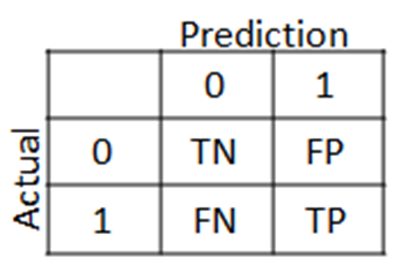

### Score Metrics Description
1. __Accuracy__ = Measure of how many correct predictions made by the model, fraud and not fraud 
2. __Precision__ = Measure of how many actual frauds caught compared to number of all returned results
3. __Recall__ = Measure of how many frauds caught compared to the number of actual frauds
4. __f1-score__ = Gives the harmonic mean of precision and recall.  2*(Recall * Precision) / (Recall + Precision)


In [9]:
NB_accuracy_score = accuracy_score(y_test, y_prediction) * 100
NB_precison_score = precision_score(y_test, y_prediction) * 100
NB_recall_score = recall_score(y_test, y_prediction) * 100
NB_f1_score = f1_score(y_test, y_prediction) * 100

print("Scores in %")
print("===============================")
print("Accuracy : ", NB_accuracy_score)
print("Precison : ", NB_precison_score)
print("Recall   : ", NB_recall_score)
print("F1       : ", NB_f1_score)


Scores in %
Accuracy :  97.9477546434465
Precison :  6.709781729991916
Recall   :  84.6938775510204
F1       :  12.434456928838951


In [10]:
from sklearn.metrics import classification_report, mean_absolute_error

print('---Classification Report---')
print(classification_report(y_test, y_prediction))

print("Model Mean Absolute Error {}".format(mean_absolute_error(y_test, y_prediction)))

---Classification Report---
             precision    recall  f1-score   support

          0       1.00      0.98      0.99     56864
          1       0.07      0.85      0.12        98

avg / total       1.00      0.98      0.99     56962

Model Mean Absolute Error 0.020522453565534917


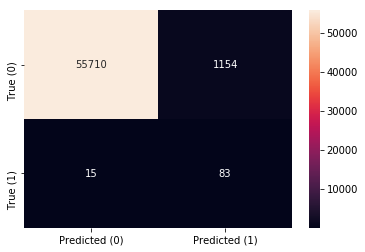

In [11]:
# Generate confusion matrix
cfm = confusion_matrix(y_test, y_prediction)
df_cm = pd.DataFrame(cfm, index = ['True (0)', 'True (1)'])
df_cm.columns = ['Predicted (0)', 'Predicted (1)']
sns.heatmap(df_cm, annot=True, fmt="d")

tn = cfm[0][0]
fp = cfm[0][1]
tp = cfm[1][1]
fn = cfm[1][0]

### Plot precision-recall curve
predict_proba is to calculate the posterior probability of the class label <br>
For example, if the probability of occurance of 0 is 0.237, then 1 is 0.762

Text(0.5,1,'2-class Precision-Recall curve: AP=0.09')

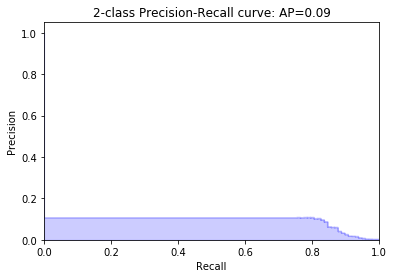

In [12]:
probas = model.predict_proba(x_test)[:,-1]
average_precision = average_precision_score(y_test, probas)
precision, recall, _ = precision_recall_curve(y_test, probas)

plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))


### Plot learning curve

<module 'matplotlib.pyplot' from 'd:\\python\\lib\\site-packages\\matplotlib\\pyplot.py'>

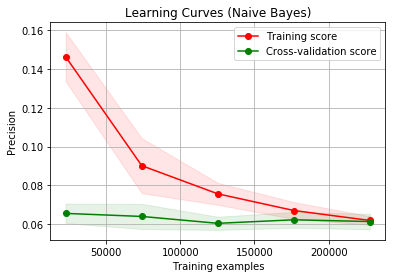

In [13]:
# Plot the learning curve

from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Precision")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring ='precision')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

title = "Learning Curves (Naive Bayes)"
estimator = GaussianNB()
plot_learning_curve(estimator, title, features, target, cv=5, n_jobs= -1)


So Naive Bayes classifier have 85% recall in capturing all the fraud. This is good, given the simplicity of the algorithm and its pretty basic and not hardware hungry <br>

However, it generate lots of false positives, as it can be described in the real world if a particular transaction has even a slightly 0.01% that it might be fraud, it is better to predict it as fraud instead of letting it go

At least raise all suspicious data which is probably at loss of precision. 
It will still reducing the amount of transaction which may has to be reviewed manually

# Cross validate Naive Bayes model

To cross validate, __K-fold cross validation__ is used. <br>

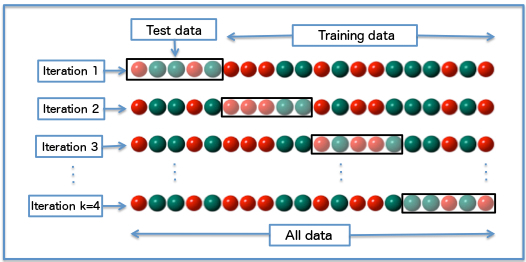

In [14]:
# Use cross-validation with 10 fold to check over-fitting
precision = cross_val_score(model, features, target, cv=5, scoring='precision', n_jobs = -1)
print("Precision: %0.2f (+/- %0.2f)" % (precision.mean(), precision.std() * 2))


Precision: 0.06 (+/- 0.01)


In [15]:
from sklearn_porter import Porter

porter = Porter(model, language='java')
output = porter.export()

# Embededd the if else rule data inside java class
# output = porter.export(embed_data=True)

# Export the if else rule data as json file
# output = porter.export(export_data=True)

print(output)

class GaussianNB {

    private double[] priors;
    private double[][] sigmas;
    private double[][] thetas;

    public GaussianNB(double[] priors, double[][] sigmas, double[][] thetas) {
        this.priors = priors;
        this.sigmas = sigmas;
        this.thetas = thetas;
    }

    public int predict(double[] features) {
        double[] likelihoods = new double[this.sigmas.length];
    
        for (int i = 0, il = this.sigmas.length; i < il; i++) {
            double sum = 0.;
            for (int j = 0, jl = this.sigmas[0].length; j < jl; j++) {
                sum += Math.log(2. * Math.PI * this.sigmas[i][j]);
            }
            double nij = -0.5 * sum;
            sum = 0.;
            for (int j = 0, jl = this.sigmas[0].length; j < jl; j++) {
                sum += Math.pow(features[j] - this.thetas[i][j], 2.) / this.sigmas[i][j];
            }
            nij -= 0.5 * sum;
            likelihoods[i] = Math.log(this.priors[i]) + nij;
        }
    
        int cla

## Save classifier, then compile it using javac -cp . GaussianNB.java

In [16]:
with open('GaussianNB.java', 'w') as f:
    f.write(output)
    

## Export the test set and test the prediction whether it is true or not

In [17]:
# test_set = pd.concat([x_test,y_test], axis=1)
# test_set.to_csv(r'test set.csv')

## Run classification: java GaussianNB 1 2 3 4 5....